<a href="https://colab.research.google.com/github/SABDIKADIR/Customer-classification/blob/main/CustomerClassificcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2023-07-24 00:18:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip’

bank-additional.zip     [  <=>               ] 434.15K  1.44MB/s    in 0.3s    

2023-07-24 00:18:37 (1.44 MB/s) - ‘bank-additional.zip’ saved [444572]



In [2]:
!unzip -o -q bank-additional.zip

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
# Data transformation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
# Features Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
# Classificators
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# warnings deactivate
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

1. `age` - client age in years (numeric)
2. `job` - type of job (categorical: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`)
3. `marital` - marital status (categorical: `divorced`, `married`, `single`, `unknown`)
4. `education` - client education (categorical: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`)
5. `default` - has credit in default? (categorical: `no`, `yes`, `unknown`)
6. `housing` - has housing loan? (categorical: `no`, `yes`, `unknown`)
7. `loan` - has personal loan? (categorical: `no`, `yes`, `unknown`)
8. `contact` - contact communication type (categorical: `cellular`, `telephone`)
9. `month` - last contact month of the year (categorical: `jan`, `feb`, `mar`, ..., `nov`, `dec`)
10. `day_of_week` - last contact day of the week (categorical: `mon`, `tue`, `wed`, `thu`, `fri`)
11. `duration` - last contact duration, in seconds (numeric).
12. `campaign` - number of contacts performed for this client during this campaign (numeric, includes last contact)
13. `pdays` - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
14. `previous` - number of contacts performed for this client before this campaign (numeric)
15. `poutcome` - outcome of the previous marketing campaign (categorical: `failure`, `nonexistent`, `success`)
16. `emp.var.rate` - employment variation rate, quarterly indicator (numeric)
17. `cons.price.idx` - consumer price index, monthly indicator (numeric)
18. `cons.conf.idx` - consumer confidence index, monthly indicator (numeric)
19. `euribor3m` - euribor 3 month rate, daily indicator (numeric)
20. `nr.employed` - number of employees, quarterly indicator (numeric)

Output feature (desired target):

21. `y` - has the client subscribed a term deposit? (binary: `yes`,`no`)1

changing categorical features that are 'object' to categorical data


In [7]:
col_cat = list(df.select_dtypes(include=['object']).columns)
col_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [8]:
df.loc[:, col_cat] = df[col_cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [9]:
df['job'].unique()

['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student',
                          'technician', 'unemployed', 'unknown']

In [10]:
X = df.iloc[:,:-1]  #input columns
y = df.iloc[:,-1]    #target column

Encoding of categorical features
using ordinalencoding function to change all categorical data into numeric data


In [11]:
col_cat = list(X.select_dtypes(include=['category']).columns)
Oridal_encording = OrdinalEncoder()
Oridal_encording.fit(X[col_cat])
X_cat_enc = Oridal_encording.transform(X[col_cat])

Now convert the numeric array of x_cat_enc into a dataframe

In [12]:
X_cat_enc = pd.DataFrame(X_cat_enc)
X_cat_enc.columns = col_cat
X_cat_enc

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
1,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0
2,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
4,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
41183,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,1.0
41184,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0
41185,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,1.0
41186,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0


Normalize numeric features to get rid of negative numbers and have all data in the same scale
Use the minmax scaler() to normalize dataframe

In [13]:
col_num = ['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = MinMaxScaler(feature_range=(0, 1))
X_num_enc = scaler.fit_transform(X[col_num])

In [14]:
X_num_enc

array([[0.48148148, 0.05307035, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.03029687, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.04595364, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.03843026, 0.01818182, ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.08987393, 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.04859699, 0.03636364, ..., 0.        , 0.08932215,
        0.        ]])

change the x_num_enc array into a dataframe

In [15]:
X_num_enc = pd.DataFrame(X_num_enc)
X_num_enc.columns = col_num
X_num_enc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41184,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41185,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41186,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000


concatenate these X_num_enc and X_cat_enc DataFrames in one input DataFrame


In [16]:
x_enc = pd.concat([X_cat_enc, X_num_enc], axis=1)
x_enc

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
1,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
2,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
4,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,1.0,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41184,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41185,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,1.0,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41186,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000


Encoding the target feature to binary

In [17]:
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)
y_enc = pd.Series(y_enc)
y_enc.columns = y.name

In [18]:
y_enc

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Length: 41188, dtype: int64

Feature Selection
Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.
selecting the top k most relevant features (largest values) via the SelectKBest class.
define the SelectKBest class to use the chi2() function and select all (or most significant) features, then transform the train and test sets.


In [19]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_enc,y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [20]:
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs       Score
18     euribor3m  890.685536
6           loan  547.958309
15  emp.var.rate  541.304067
19   nr.employed  502.655177
14      poutcome  441.453204
11      campaign  358.018123
3      education  321.922903
2        marital  167.607283
13      previous  157.983753
9    day_of_week   98.231174


Using Mutual Information Statistic for feature selection

In [21]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(x_enc,y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs     Score
11        campaign  0.077302
18       euribor3m  0.071824
17   cons.conf.idx  0.070429
16  cons.price.idx  0.067227
19     nr.employed  0.063887
15    emp.var.rate  0.055117
13        previous  0.039362
9      day_of_week  0.036799
7          contact  0.030987
14        poutcome  0.019869


Feature Importance
using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [23]:
model = ExtraTreesClassifier()
model.fit(x_enc,y_enc)

ExtraTreesClassifier()

In [24]:
print(model.feature_importances_)

[0.05752958 0.03403756 0.05343757 0.01030058 0.02721202 0.01939484
 0.01328391 0.01627778 0.049537   0.02574469 0.08840496 0.26534568
 0.05913855 0.04981975 0.01294676 0.03025433 0.01930608 0.0239385
 0.09936059 0.04472928]


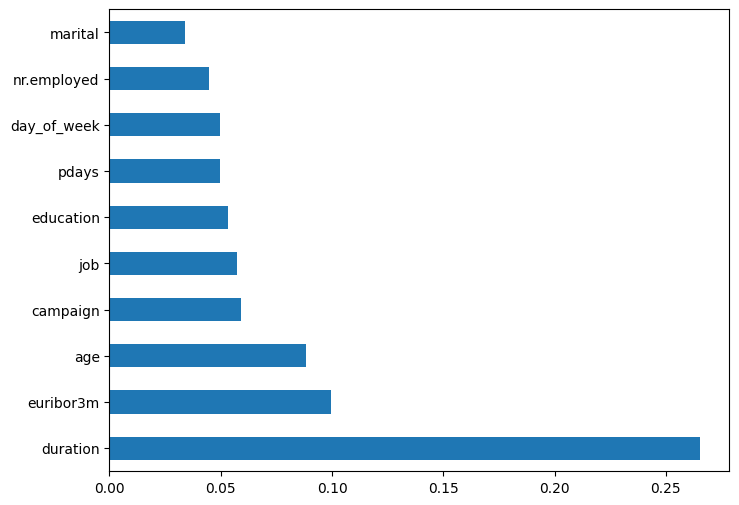

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

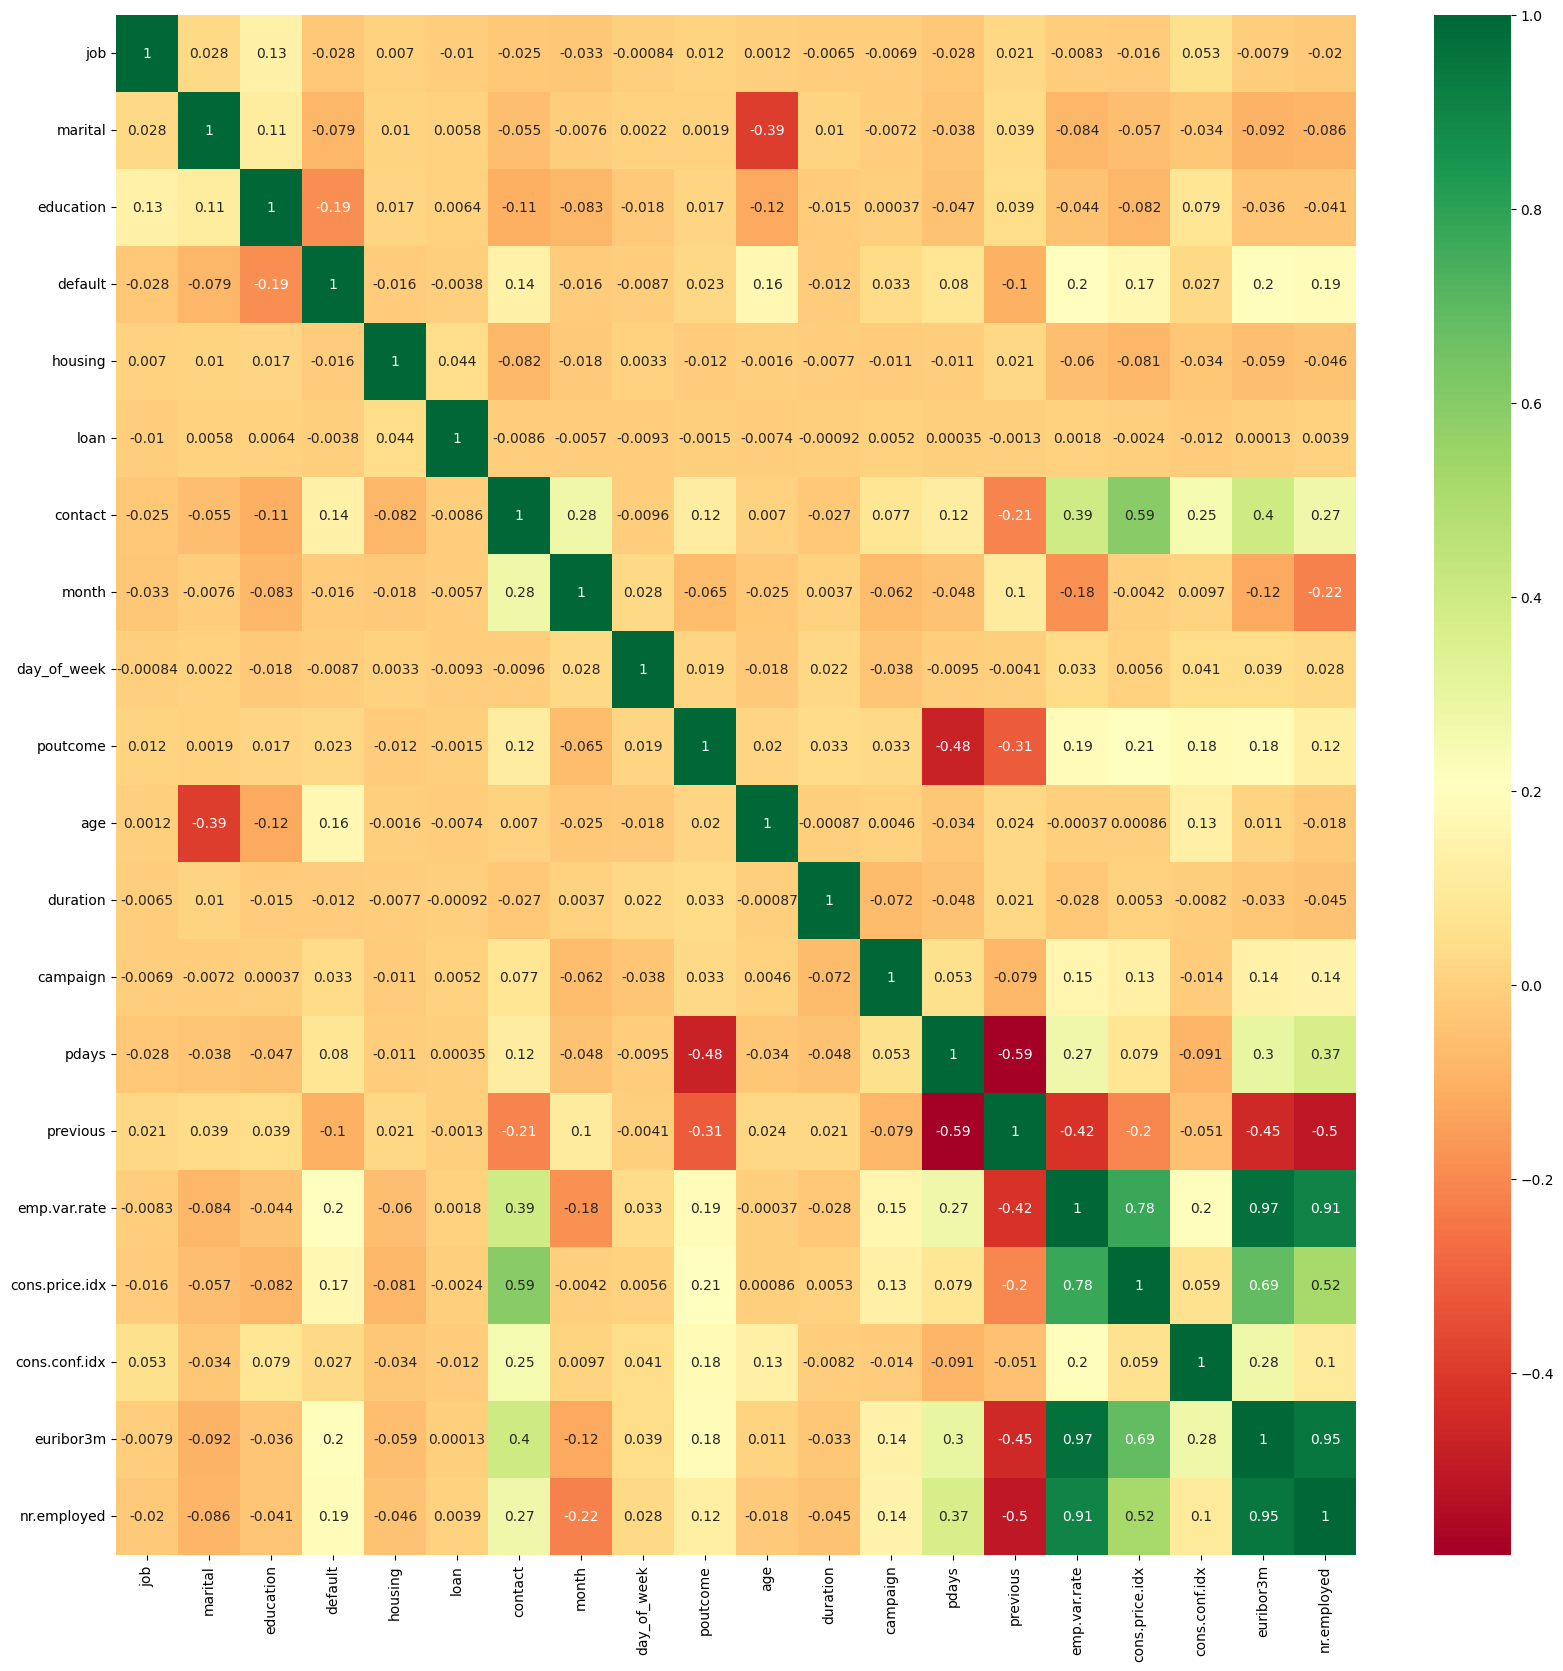

In [26]:
corrmat = x_enc.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(x_enc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
col = x_enc.columns
col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [28]:
x_enc = x_enc[col]

Split the data to train and test data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_enc, y_enc, test_size=0.33, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (27595, 20)
X_test: (13593, 20)
y_train: (27595,)
y_test: (13593,)


Using the Exact Tree Classifier

In [30]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [31]:
yhat = model.predict(X_test)
print(yhat)

[0 0 0 ... 1 0 0]


In [32]:
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.64


Logistic regression model

In [33]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.98


Decision Tree model

In [34]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 88.99


In [35]:
print("Features impotance:", model.feature_importances_)

Features impotance: [0.04343981 0.02483746 0.039584   0.00583083 0.01826517 0.01312084
 0.00710401 0.01305522 0.03564415 0.02098949 0.09417817 0.3545527
 0.03223467 0.01310351 0.0090986  0.00444369 0.01588642 0.02896687
 0.0734171  0.15224728]


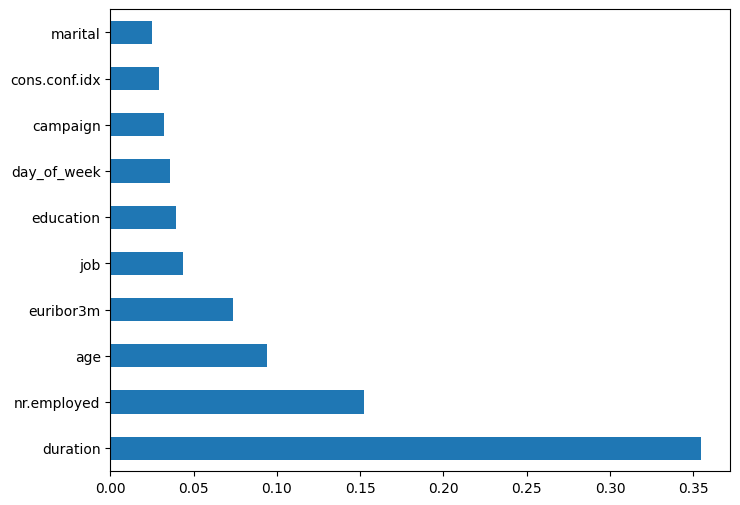

In [36]:
feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Choose the 10 best features

In [37]:
feat_importances.nlargest(10)

duration         0.354553
nr.employed      0.152247
age              0.094178
euribor3m        0.073417
job              0.043440
education        0.039584
day_of_week      0.035644
campaign         0.032235
cons.conf.idx    0.028967
marital          0.024837
dtype: float64

In [38]:
col = feat_importances.nlargest(10).index
col

Index(['duration', 'nr.employed', 'age', 'euribor3m', 'job', 'education',
       'day_of_week', 'campaign', 'cons.conf.idx', 'marital'],
      dtype='object')

Refit the model

In [39]:
X_train_dt = X_train[col]
X_test_dt = X_test[col]
model.fit(X_train_dt, y_train)
yhat = model.predict(X_test_dt)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 88.60


In [40]:
from sklearn.tree import export_text

In [41]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 0.47
|   |--- feature_0 <= 0.03
|   |   |--- feature_0 <= 0.03
|   |   |   |--- feature_0 <= 0.02
|   |   |   |   |--- feature_3 <= 0.02
|   |   |   |   |   |--- feature_2 <= 0.65
|   |   |   |   |   |   |--- feature_3 <= 0.02
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  0.02
|   |   |   |   |   |   |   |--- feature_5 <= 4.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_5 >  4.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  0.65
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  0.02
|   |   |   |   |   |--- feature_0 <= 0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  0.01
|   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |--- feature_2 <= 0.46
|   |   |   |   |   |   |   |   |--- feature_3 <= 0.14
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |

In [42]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

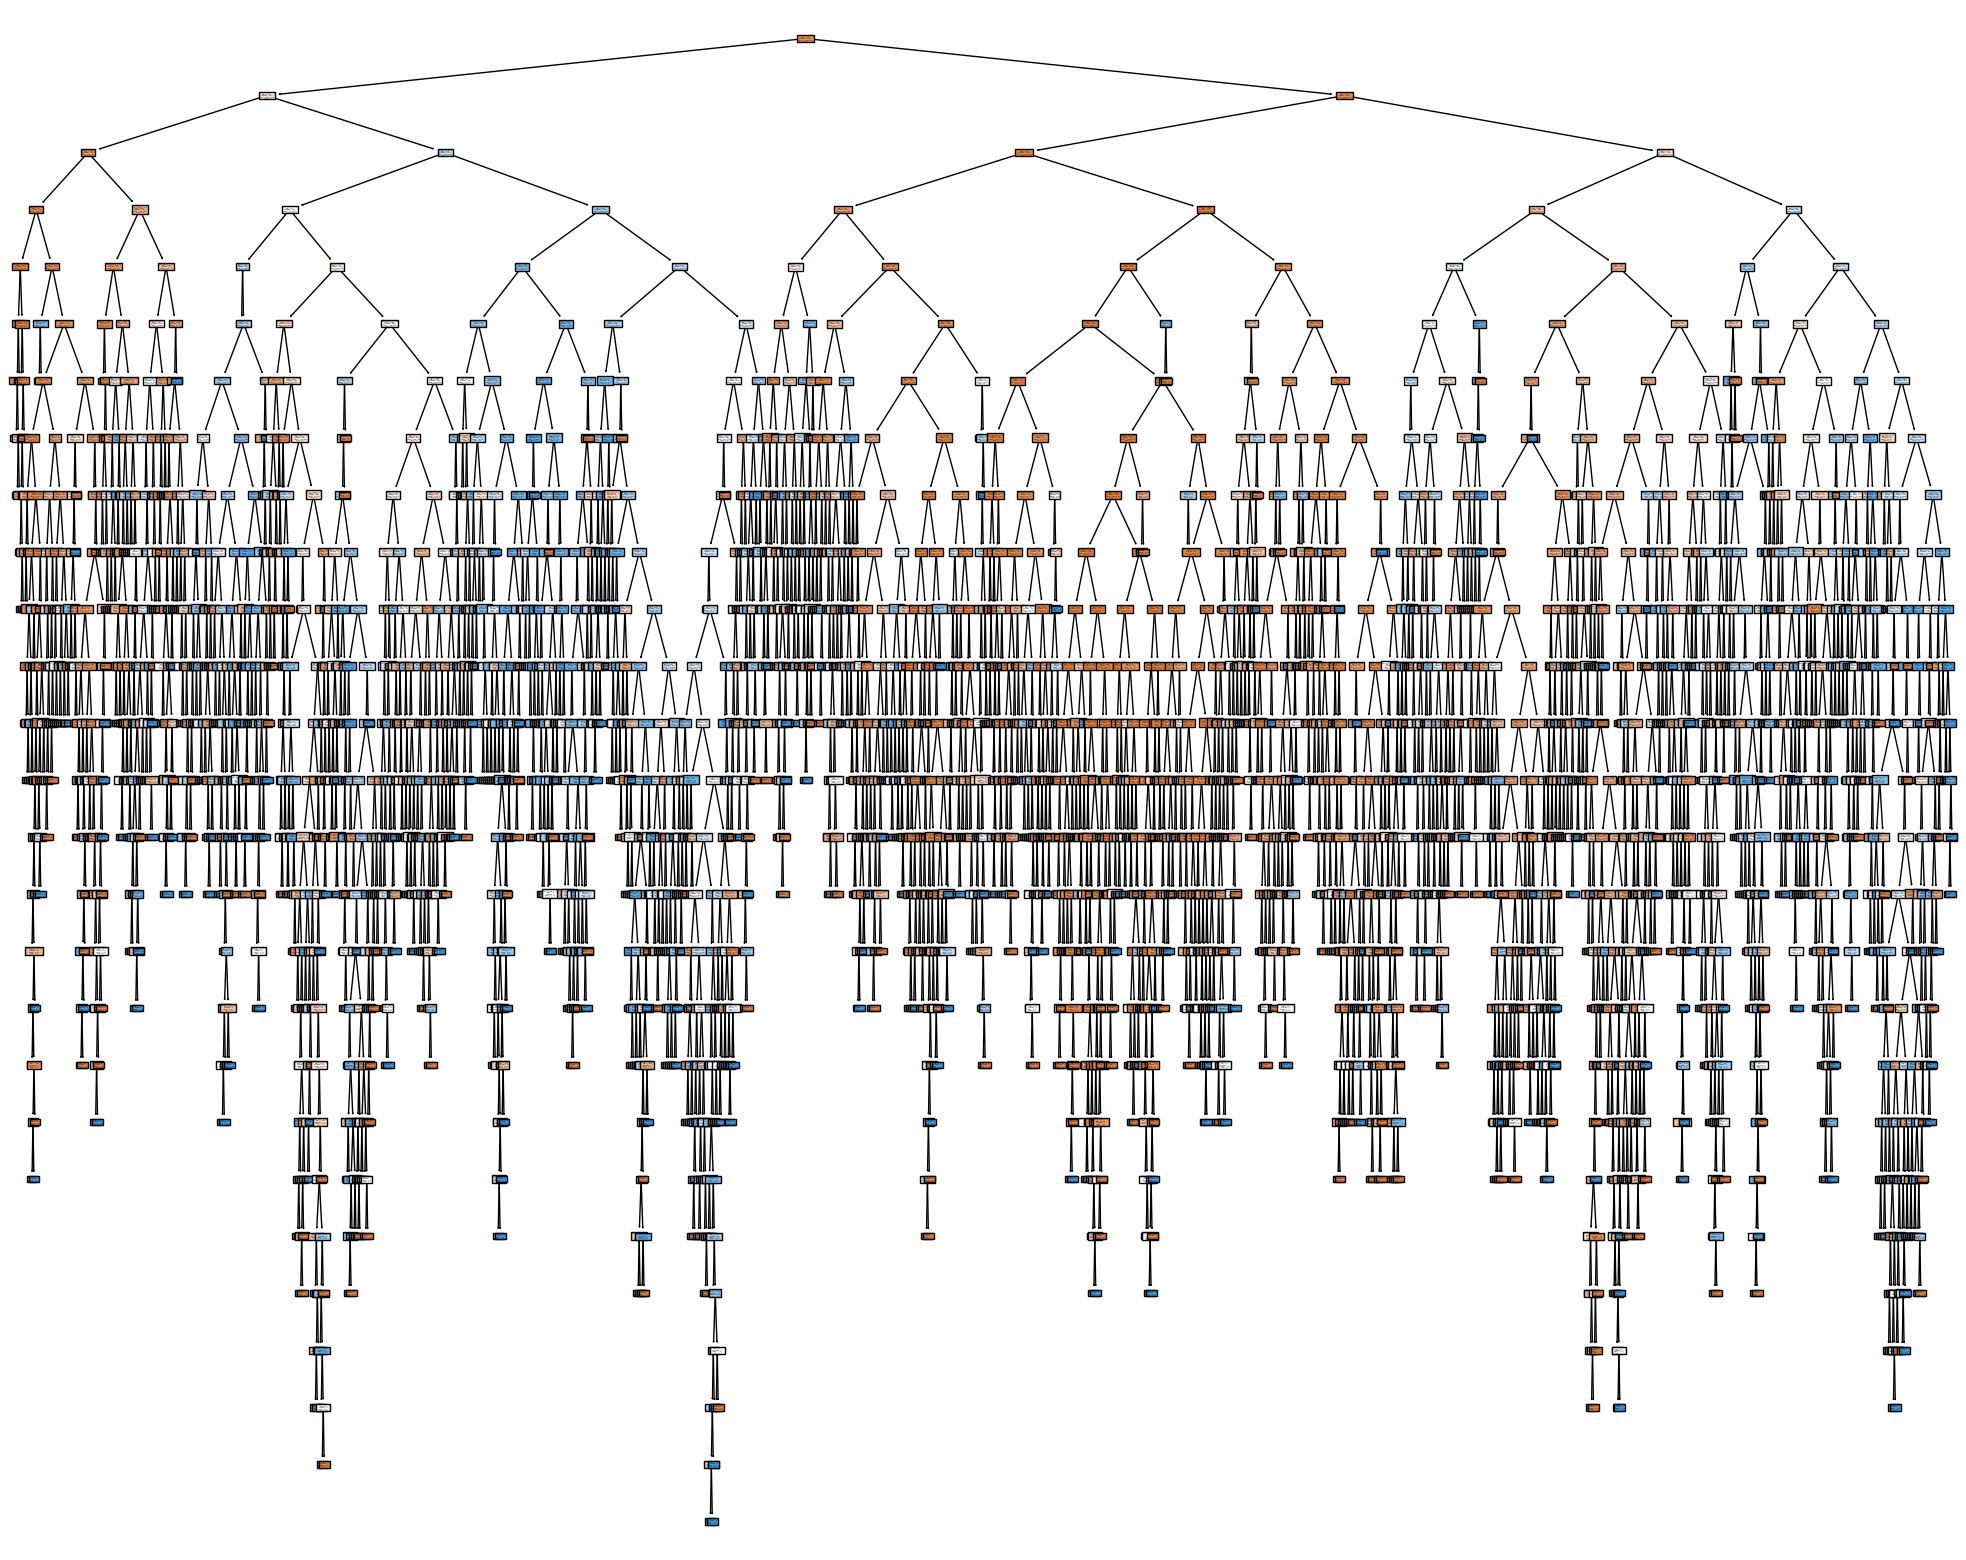

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
               feature_names = col,
               class_names = y.unique(),
               filled = True)

In [44]:
fig.savefig('decision_tree.png')